Write a Python script to collect review data via web-scraping, APIs and data  connectors from different social media sites and display the most important words  using visualization tool such as word cloud. 

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns

In [ ]:
# <!-- <div class="DOjaWF gdgoEp"> 
# cPHDOP col-12-12 </div>
# <div class="KzDlHZ">Lenovo Chromebook MediaTek Kompanio 520 - (4 GB/128 GB EMMC Storage/Chrome OS) 14M868 Chromebook</div>
# <div class="Nx9bqj _4b5DiR">₹12,990</div>


# <div class="XQDdHH">3.7</div> -->

# <div class="f8qK5m">4.3</div>

In [19]:
def fetch_all_reviews(baseurl):
    """Scrape all matching data from the given URL."""
    headers = {
    'User-Agent': 'Chrome/89.0.4389.82'
    }
    extracted_data = []
    for page in range(1,16):
        url = f"{baseurl}{page}"
        response = requests.get(url, headers=headers)
        if response.status_code != 200:
            print(f"Failed to fetch the page. Status code: {response.status_code} {page}")
            return None
    
        soup = BeautifulSoup(response.text, 'html.parser')

        # Extract all product names
        product_names = [div.text for div in soup.find_all('div', class_='KzDlHZ')]

        # Extract all prices
        prices = [div.text for div in soup.find_all('div', class_='Nx9bqj _4b5DiR')]

        # Extract all ratings
        ratings = [div.text for div in soup.find_all('div', class_='XQDdHH')]

    # Combine extracted data
    
        for i in range(len(product_names)):
            product = {
                "Product Name": product_names[i] if i < len(product_names) else "N/A",
                "Price": prices[i] if i < len(prices) else "N/A",
                "Rating": ratings[i] if i < len(ratings) else "N/A"
            }
            extracted_data.append(product)
    
    return extracted_data

def save_all_to_txt(data, filename):
    """Save all extracted data to a .txt file."""
    with open(filename, 'w') as file:
        for entry in data:
            if 'hp' not in entry['Product Name'].lower():
                continue
            file.write(f"Product Name: {entry['Product Name']}\n")
            file.write(f"Price: {entry['Price']}\n")
            file.write(f"Rating: {entry['Rating']}\n")
            file.write("\n")
    print(f"Data saved to {filename}")

def convert_price_to_int(data):
    for entry in data:
        price = entry["Price"]
        price = price.replace("₹", "").replace(",", "")
        entry["Price"] = int(price)

def save_all_to_csv(data, filename):
    """Save all extracted data to a .csv file."""
    import csv

    with open(filename,'w', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=data[0].keys())
        writer.writeheader()
        for entry in data:
            if 'hp' not in entry['Product Name'].lower():
                continue
            writer.writerow(entry)

if __name__ == "__main__":
    # URL of the page to scrape
    url = "https://www.flipkart.com/laptops/pr?sid=6bo%2Cb5g&otracker=categorytree&p%5B%5D=facets.brand%255B%255D%3DHP&p%5B%5D=facets.price_range.from%3DMin&p%5B%5D=facets.price_range.to%3D75000&page="

    # Fetch all the data
    print("Scraping data...")
    review_data = fetch_all_reviews(url)

    # print(review_data)
    if review_data:
        # Save all data to a .txt file
        save_all_to_txt(review_data, "all_product_reviews.txt")
        convert_price_to_int(review_data)
        save_all_to_csv(review_data, "laptops.csv")
        

Scraping data...
Data saved to all_product_reviews.txt


In [29]:
nltk.download('punkt_tab')  # This will download the tokenizer models
nltk.download('stopwords')  # Optional: For stopword removal
nltk.download('wordnet')  # For lemmatizer support
nltk.download('omw-1.4')     # For stopwords

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\asmit\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asmit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asmit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\asmit\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

Word Frequencies:
 Counter({'gb': 293, 'hp': 283, 'product': 280, 'name': 280, 'price': 280, 'rating': 280, 'core': 266, 'intel': 192, '11': 148, '8': 142, 'home': 134, 'chromebook': 126, 'thin': 104, 'gen': 102, '4': 97, 'amd': 90, 'o': 79, 'light': 79, 'ryzen': 78, 'emmc': 75, 'dual': 72, 'celeron': 66, '5': 59, '16': 58, 'i3': 56, 'i5': 53, 'laptop': 50, '15': 44, 'hexa': 41, '12th': 37, 'pavilion': 36, 'n4500': 34, '11th': 32, 'chromeb': 30, '10': 30, 'plus': 29, 'n4120': 28, 'g9': 27, 'quad': 27, 'victus': 24, '3': 23, '13th': 20, '2': 19, 'lap': 18, 'g8': 16, 'mediatek': 16, 'tb': 16, '1235u': 15, 'chrom': 15, 'mt8183': 15, 'na1004tu': 14, 'chrome': 14, 'na0012tu': 14, 'n305': 14, '11mk': 14, 'ee': 14, '14': 14, '5500u': 13, 'geforce': 13, '255': 10, 'l': 10, '1115g4': 10, '5600h': 9, '1215u': 8, '1335u': 8, '10th': 8, 'radeon': 8, '3250u': 7, 'lapto': 7, '240': 7, 'athlon': 6, 'ligh': 6, '7': 6, '12450h': 6, 'x360': 6, 'rtx': 6, 'business': 5, 'lig': 5, 'lapt': 5, 'octa': 5, '56

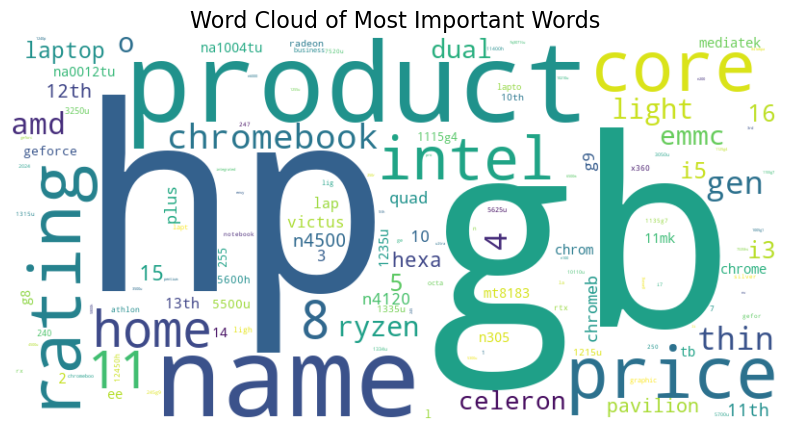

In [33]:
with open("all_product_reviews.txt", "r") as file:
    extracted_data = file.read()

lowercase_data = extracted_data.lower()
tokens = word_tokenize(lowercase_data)


stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

word_counts = Counter(lemmatized_tokens)
print("Word Frequencies:\n", word_counts)

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate_from_frequencies(word_counts)



plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Most Important Words", fontsize=16)
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product Name  280 non-null    object 
 1   Price         280 non-null    int64  
 2   Rating        267 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.7+ KB


<Axes: >

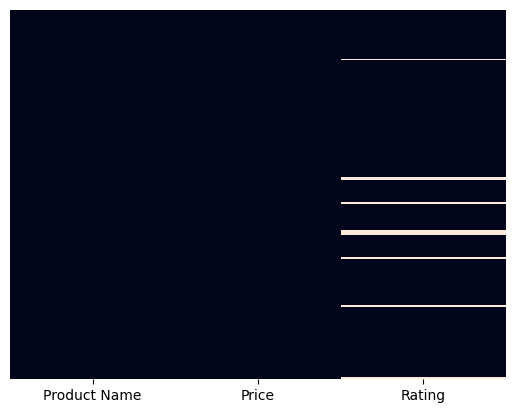

In [25]:
df = pd.read_csv("laptops.csv")
product_names = df["Product Name"]
prices = df["Price"]
ratings = df["Rating"]
df.info()
sns.heatmap(df.isna(), yticklabels=False, cbar=False)


(267, 3)


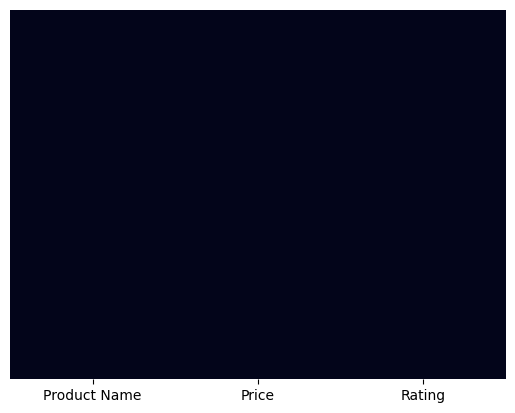

In [22]:
df.dropna(inplace=True)
sns.heatmap(df.isna(), yticklabels=False, cbar=False)
print(df.shape)

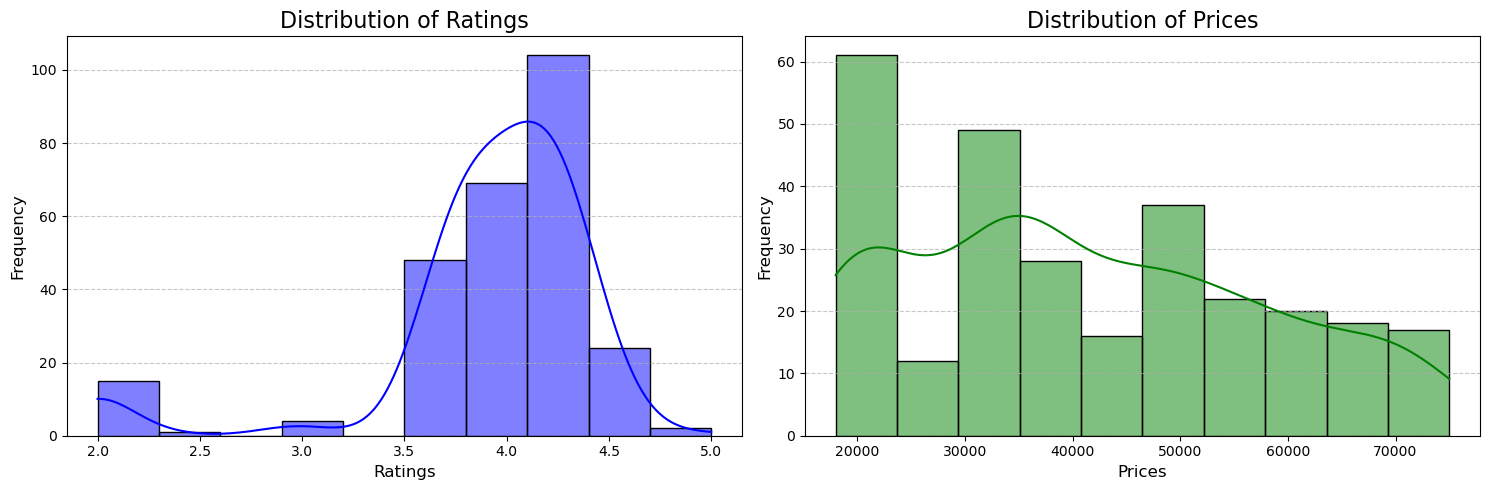

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Ratings Distribution
sns.histplot(ratings, kde=True, bins=10, color='blue', edgecolor='black', ax=axes[0])
axes[0].set_title('Distribution of Ratings', fontsize=16)
axes[0].set_xlabel('Ratings', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Prices Distribution
sns.histplot(prices, kde=True, bins=10, color='green', edgecolor='black', ax=axes[1])
axes[1].set_title('Distribution of Prices', fontsize=16)
axes[1].set_xlabel('Prices', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [32]:
cor_mat = df[['Price','Rating']].corr()
print(cor_mat)

           Price    Rating
Price   1.000000  0.055208
Rating  0.055208  1.000000


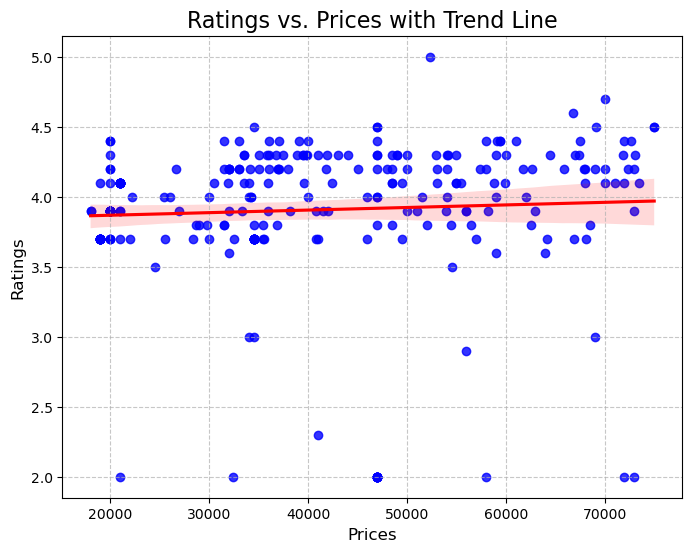

In [28]:
plt.figure(figsize=(8, 6))
sns.regplot(x=prices, y=ratings, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Ratings vs. Prices with Trend Line', fontsize=16)
plt.xlabel('Prices', fontsize=12)
plt.ylabel('Ratings', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()